In [126]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [127]:
print(os.getcwd())

C:\Users\ynrob\ValNet PyTesting


In [128]:
basePath = os.path.dirname(os.path.abspath(r'C:\Users\ynrob\ValNet PyTesting\temp.json'))

In [129]:
print(basePath)

C:\Users\ynrob\ValNet PyTesting


In [130]:
rdata = pd.read_json(r'C:\Users\ynrob\ValNet PyTesting\temp.json', orient='index')

In [134]:
refData = pd.DataFrame.from_dict(rdata)

In [11]:
#Expects two bools, that states either each team won the match
def checkWinner(redWon: bool, blueWon: bool) -> int:
    if (redWon == blueWon): 
        return 2 
    else:
        return int(blueWon)
#Returns an int, either 0, 1, or 2. Specifically, checks for a tie. If tied, returns 2, otherwise returns whether blue team won the match

In [13]:
#Takes a json table of a given match and outputs the winner
def getMatchWinner(match: dict) -> int:
    return checkWinner(match["matches"]["teams"][0]["won"],
                       match["matches"]["teams"][1]["won"])

In [225]:
def winnerOneHot(win: int) -> np.array:
    res = np.zeros(2, dtype=int)
    if win == 1:
        res[0] = 1
    if win == 2:
        res[1] = 1
    return res

In [16]:
#Turns the map dict into a list
def mapDictToList(dictOfMaps: dict) -> list:
    #Gets the keys from the dict
    mapKeys = list()
    mapKeys.extend((dictOfMaps))
    return mapKeys

In [119]:
def getMaps(dataSet: dict) -> list:
     #list of the maps and distribution
    dictOfMaps = {}
    
    for e in range(dataSet.size):
        if (dictOfMaps.get(dataSet[e]["matches"]["matchInfo"]["mapId"])) is None:
            dictOfMaps.update({dataSet[e]["matches"]["matchInfo"]["mapId"] : 1})
        else:
            dictOfMaps.update({dataSet[e]["matches"]["matchInfo"]["mapId"] : dictOfMaps.get(dataSet[e]["matches"]["matchInfo"]["mapId"])+1})
    mapKeys = mapDictToList(dictOfMaps)
    return mapKeys

In [19]:
#One Hot Encode Map Ids to a np array 
#Expects a string and a list of maps
#Uses the keys to create a new array
def oneHotMaps(mapId: str, mapKeys: list) -> np.array:
    if mapKeys.count(mapId) == 0:
        mapKeys.append(mapId)
    encodedList = np.zeros(len(mapKeys), dtype=int)
    for index, key in enumerate(mapKeys):
        if mapKeys[index] == mapId:
            encodedList[index] = 1
    return encodedList
        
#Expected Output: A NP Array that consists of as many zeros as there are unique maps
#For a given match, that map's location in the np array is flipped to 1

In [21]:
#Function that checks which of the teams each player is apart of
def teamEncode(playerList: list):
    encodedList = np.zeros(len(playerList), dtype=int)
    for i, k in enumerate(playerList):
        if k['teamId'] == 'BLUE':
            encodedList[i] = 1
    return encodedList
        
#Expected Output: NP array 10 long, each element acts as a player, and the value
#of the element is either 0 for red or 1 for blue

In [22]:
#Function that gets the character each player is playing for each team
def charPerTeam(playerList: list) -> list:
    charList = []
    for i, k in enumerate(playerList):
        charList.append(k['characterId'])
    return charList
#Expected Output: Two Arrays that contain the string values for each of the teams, 
#first array is red team second array is blue team

In [23]:
def oneHotChar(charId: str) -> np.array:
    characterReferenceList = ["5f8d3a7f-467b-97f3-062c-13acf203c006", 
                              "f94c3b30-42be-e959-889c-5aa313dba261",
                              "117ed9e3-49f3-6512-3ccf-0cada7e3823b",
                              "320b2a48-4d9b-a075-30f1-1f93a9b638fa",
                              "707eab51-4836-f488-046a-cda6bf494859",
                              "eb93336a-449b-9c1b-0a54-a891f7921d69",
                              "9f0d8ba9-4140-b941-57d3-a7ad57c6b417",
                              "569fdd95-4d10-43ab-ca70-79becc718b46",
                              "8e253930-4c05-31dd-1b6c-968525494517",
                              "add6443a-41bd-e414-f6ad-e58d267f4e95",
                              "a3bfb853-43b2-7238-a4f1-ad90e9e46bcc",
                              "22697a3d-45bf-8dd7-4fec-84a9e28c69d7",
                              "601dbbe7-43ce-be57-2a40-4abd24953621",
                              "36FB82AF-409D-C0ED-4B49-57B1EB08FBD5"
                             ]
    encodedList = np.zeros(len(characterReferenceList), dtype=int)
    i = 0
    for char in characterReferenceList:
        if charId in char:
            encodedList[i] = 1
        i = i + 1
    return encodedList
#	std::string zero = "5f8d3a7f-467b-97f3-062c-13acf203c006"
#	std::string one = "f94c3b30-42be-e959-889c-5aa313dba261"
#	std::string two = "117ed9e3-49f3-6512-3ccf-0cada7e3823b"
#	std::string three = "320b2a48-4d9b-a075-30f1-1f93a9b638fa"
#	std::string four = "707eab51-4836-f488-046a-cda6bf494859"
#	std::string five = "eb93336a-449b-9c1b-0a54-a891f7921d69"
#	std::string six = "9f0d8ba9-4140-b941-57d3-a7ad57c6b417"
#	std::string seven = "569fdd95-4d10-43ab-ca70-79becc718b46"
#	std::string eight = "8e253930-4c05-31dd-1b6c-968525494517"
#	std::string nine = "add6443a-41bd-e414-f6ad-e58d267f4e95"
#	std::string ten = "a3bfb853-43b2-7238-a4f1-ad90e9e46bcc"
#	std::string eleven = "22697a3d-45bf-8dd7-4fec-84a9e28c69d7"
#	std::string twelve = "601dbbe7-43ce-be57-2a40-4abd24953621"
#	std::string minusOne = "36FB82AF-409D-C0ED-4B49-57B1EB08FBD5"

In [178]:
#Function that gets a full encoded list of np arrays
def teamChars(players: list) -> np.array:
    teamPerPlayer = teamEncode(players)
    #print(r"Team Per Player: {}".format(teamPerPlayer)) 
    redChars = np.zeros(14, dtype=int)
    blueChars = np.zeros(14, dtype=int)
    i = 0
    for player in players:
        charId = oneHotChar(player['characterId'])
        #print(r"One hot: {}".format(charId))
        if teamPerPlayer[i] == 0:
            blueChars = blueChars + charId
            #print(r"blueChars: {}".format(blueChars))
        else:
            redChars = redChars + charId
            #print(r"redChars: {}".format(redChars))
        i = i + 1
    #print(redChars)
    #print(blueChars)
    resChars = np.zeros(28, dtype=int)
    k = 0
    for j in range(28):
        if j > 13:
            if k == 14:
                k = 0
            resChars[j] = blueChars[k]
            k = k + 1
        else:
            resChars[j] = redChars[k]
            k = k + 1
    return resChars

In [276]:
#Function that takes the info from each of the previous arrays, and places each matches' info into a row, and each of the individual datapoints into columns of a np array
def concatArrays(match: dict, maps: list) -> np.array:
    res = np.zeros(1 + (len(maps)) + 28, dtype=int)
    res[0] = getMatchWinner(match)
    #winner = oneHotWinner(getMatchWinner(match))
    mapId = oneHotMaps(match["matches"]["matchInfo"]["mapId"], maps)
    charIds = teamChars(match["matches"]["players"])
    #print(r"Red, Blue, Draw: {}".format(res[0]))
    #print(r"Map: {}".format(mapId))
    #print(r"Chars: {}".format(charIds))
    #for k in range(len(winner)):
    #    res[k] = winner[k]
    resIndex = 1
    for i in range(len(mapId)):
        if mapId[i] == 1:
            res[resIndex] = mapId[1]
        resIndex = resIndex + 1
    for j in range(len(charIds)):
        res[resIndex] = charIds[j]
        resIndex = resIndex + 1
    return res
    

In [277]:
def formatDataToArrays(matches: dict, mapList: list) -> list:
    resArrays = []
    for match in range(matches.size):
        res = concatArrays(matches[match], mapList)
        #print(res)
        resArrays.append(res)
    return resArrays
     

In [328]:
def gatherTrainingData() -> np.array:
    m = pd.read_json(r'C:\Users\ynrob\ValNet PyTesting\test.json'.format(), orient='index')
    matches = pd.DataFrame.from_dict(m)
    mapList = getMaps(matches)
    res = []
    for i in range(11):
        if i < 1: 
            continue
        data = pd.read_json(r'C:\Users\ynrob\ValNet PyTesting\{}.json'.format(i), orient='index')
        trainingData = pd.DataFrame.from_dict(data)
        tempData = formatDataToArrays(trainingData, mapList)
        for match in range(len(tempData)):
            tmp = tempData[match]
            res.append(tmp)
        #res.append(formatDataToArrays(trainingData))
    resData = np.array(res)
    return resData

In [329]:
trainingData = gatherTrainingData()

In [330]:
trainingData.shape

(1000, 36)

In [280]:
def gatherTestingData() -> np.array:
    m = pd.read_json(r'C:\Users\ynrob\ValNet PyTesting\test.json'.format(), orient='index')
    matches = pd.DataFrame.from_dict(m)
    mapList = getMaps(matches)
    res = []
    testData = formatDataToArrays(matches, mapList)
    for match in range(len(testData)):
            tmp = testData[match]
            res.append(tmp)
    resData = np.array(res)
    return resData

In [281]:
testData = gatherTestingData()

In [371]:
m, n = trainingData.shape
np.random.shuffle(trainingData)

data_dev = testData.T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = trainingData.T
Y_train = data_train[0]
X_train = data_train[1:n]


In [476]:
print(trainingData.shape)
print(testData.shape)
print(data_dev.shape)
print(Y_dev.shape)
print(X_dev.shape)
print(data_train.shape)
print(Y_train.shape)
print(X_train.shape)

(1000, 36)
(100, 36)
(36, 100)
(100,)
(35, 100)
(36, 1000)
(1000,)
(35, 1000)


In [373]:
def oneHot(Y):
    oneHotY = np.zeros((Y.size, Y.max() +1))
    oneHotY[np.arange(Y.size), Y] = 1
    oneHotY = oneHotY.T
    return oneHotY

In [513]:
def initParams():
    W1 = np.random.rand(3, 35)
    b1 = np.random.rand(3, 1)
    W2 = np.random.rand(3, 3)
    b2 = np.random.rand(3, 1)
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)
    
def softmax(Z):
    exp = np.exp(Z - np.max(Z))
    return exp / exp.sum(axis=0)

def forwardProp(W1, b1, W2, b2, X):
    #print(W1.shape)
    #print(X.shape)
    #print(b1.shape)
    
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(np.nan_to_num(Z2))
    
    #print(W1.shape)
    #print(b1.shape)
    #print(W2.shape)
    #print(b2.shape)
    
    return Z1, A1, Z2, A2
    
def derivReLU(Z) -> int:
    return Z > 0
    
def backProp(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    oneHotY = oneHot(Y)
    #print(A2.shape)
    dZ2 = A2 - oneHotY
    #print(dZ2.shape)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, 1)
    #Changing np.sum(dZ2, 2) -> np.sum(dZ2, 1) -> np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, 1)
    return dW1, db1, dW2, db2

def updateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * np.reshape(db1, (3, 1))
    W2 -= alpha * dW2
    b2 -= alpha * np.reshape(db2, (3, 1))
    #print(W1.shape)
    #print(b1.shape)
    #print(W2.shape)
    #print(b2.shape)
    return W1, b1, W2, b2

In [542]:
def getPreds(A2):
    return np.argmax(A2, 0)

def getAcc(preds, Y):
    #print(preds, Y)
    return np.sum(preds == Y) / Y.size

def gradDescent(X, Y, iters, alpha):
    W1, b1, W2, b2 = initParams()
    #print(W1)
    #print(W1.shape)
    #print(b1)
    #print(b1.shape)
    #print(W2)
    #print(W2.shape)
    #print(b2)
    #print(b2.shape)
    XPlt = []
    YPlt = []
    for i in range(iters):
        Z1, A1, Z2, A2 = forwardProp(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backProp(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = updateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            XPlt.append(i)
            YPlt.append(getAcc(getPreds(A2), Y))
            #print("Iteration Number: ", i)
            #print("Accuracy: ", getAcc(getPreds(A2), Y))
    plt.plot(XPlt, YPlt)
    plt.xlabel('Iteration Number')                 
    plt.ylabel('Accuracy, as percent')
    plt.title(r'2 Layer Classifier, alpha: {}'.format(alpha))
    plt.suptitle(r'Max Acc: {}'.format(max(YPlt)))
    plt.show()
    return W1, b1, W2, b2

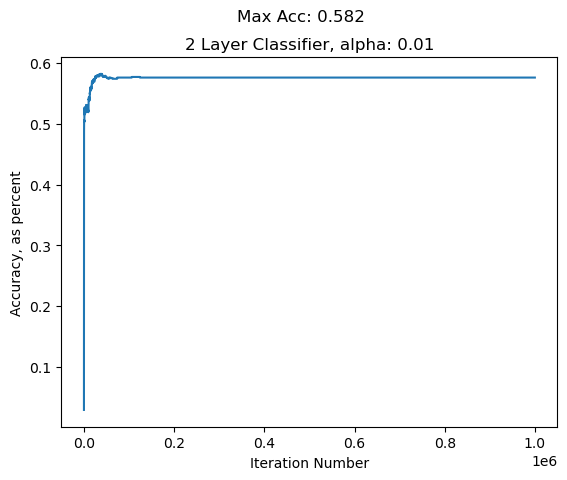

In [543]:
W1, b1, W2, b2 = gradDescent(X_train, Y_train, 1000000, 0.01)

In [ ]:
X_train.shape

In [521]:
Y_train.shape

(1000,)

In [456]:
a = np.array(((1, 4),
              (2, 3)))
a.shape

(2, 2)

In [459]:
np.sum(a, 0)

array([3, 7])

In [471]:
b = np.array((((2, 1, 1), 
              (1, 1, 1), 
              (1, 1, 1)),
             ((1, 1, 1), 
              (1, 1, 1), 
              (1, 1, 1)),
             ((1, 1, 1), 
              (1, 1, 1), 
              (1, 1, 1)),
            ))
b.shape

(3, 3, 3)

In [470]:
#print(np.sum(b, 0))
#print(np.sum(b, 1))
print(np.sum(b, 2))

[[4 3 3]
 [3 3 3]
 [3 3 3]]
